In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 学習用データの読み込み
df = np.loadtxt('../files/click.csv', delimiter=',', skiprows=1)

In [4]:
df.shape

(20, 2)

In [5]:
train_x = df[:, 0]
train_y = df[:, 1]

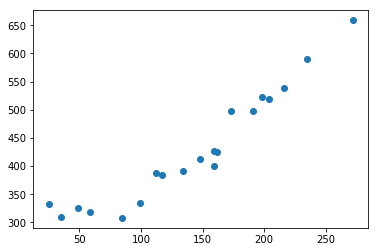

In [6]:
plt.plot(train_x, train_y, 'o')

１次関数での予測
---

### 予測関数
$f\theta(x) = \theta_0 + \theta_1x$  

### 目的関数
$\displaystyle E(\theta) = \frac{1}{2}\sum_{i=1}^n(y_i - f\theta(x_i))^2$

In [7]:
# パラメータを初期化(乱数)
theta0 = np.random.rand()
theta1 = np.random.rand()

In [8]:
# 予測関数
def f(x):
    return theta0 + theta1 * x

In [10]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

### データの標準化(正規化)

$\displaystyle z^{(i)} = \frac{x^{(i)} - \mu}{\sigma}$
- 平均を0
- 分散を1にする

In [11]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [12]:
train_z = standardize(train_x)

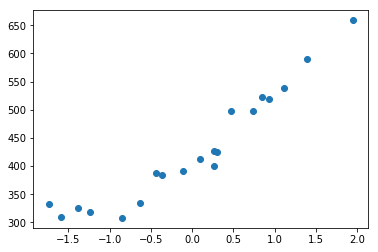

In [13]:
plt.plot(train_z, train_y, 'o')

- 横軸のスケールだけが変わる

### パラメタ更新式

$\displaystyle \theta_0 := \theta_0 - \eta \sum_{i=1}^n(f_\theta(x^{i}) - y^{i})$

$\displaystyle \theta_1 := \theta_1 - \eta \sum_{i=1}^n(f_\theta(x^{i}) - y^{i})x^{(i)}$

In [16]:
# 学習率
ETA = 1e-3

In [18]:
# 誤差の差分
diff = 1

In [19]:
# 更新回数
count = 0

In [20]:
# 学習
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    # パラメタを更新
    theta0 = tmp0
    theta1 = tmp1
    # 前回との誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    # ログ出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目: theta0 = 9.157, theta1 = 2.642, 差分 = 76134.5081
2回目: theta0 = 17.557, theta1 = 4.459, 差分 = 73119.5816
3回目: theta0 = 25.789, theta1 = 6.239, 差分 = 70224.0461
4回目: theta0 = 33.856, theta1 = 7.984, 差分 = 67443.1739
5回目: theta0 = 41.762, theta1 = 9.694, 差分 = 64772.4242
6回目: theta0 = 49.510, theta1 = 11.370, 差分 = 62207.4362
7回目: theta0 = 57.102, theta1 = 13.012, 差分 = 59744.0218
8回目: theta0 = 64.543, theta1 = 14.621, 差分 = 57378.1585
9回目: theta0 = 71.835, theta1 = 16.198, 差分 = 55105.9834
10回目: theta0 = 78.982, theta1 = 17.744, 差分 = 52923.7865
11回目: theta0 = 85.985, theta1 = 19.259, 差分 = 50828.0045
12回目: theta0 = 92.848, theta1 = 20.743, 差分 = 48815.2155
13回目: theta0 = 99.574, theta1 = 22.198, 差分 = 46882.1330
14回目: theta0 = 106.166, theta1 = 23.623, 差分 = 45025.6005
15回目: theta0 = 112.626, theta1 = 25.021, 差分 = 43242.5868
16回目: theta0 = 118.956, theta1 = 26.390, 差分 = 41530.1803
17回目: theta0 = 125.160, theta1 = 27.731, 差分 = 39885.5852
18回目: theta0 = 131.240, theta1 = 29.046, 差分 = 38306.1160
19

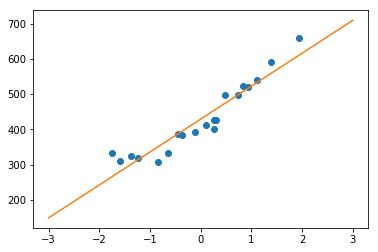

In [21]:
# 学習結果を描画
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))

### 予測/検証

In [22]:
f(standardize(100))

370.9672231802331

In [23]:
f(standardize(200))

510.46992104420326

In [24]:
f(standardize(300))

649.9726189081734